<a href="https://colab.research.google.com/github/johnny-tran/COGS108_repo/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A11888496 - L4truong@ucsd.edu - Loc Truong
- A15352670 - t8wei@ucsd.edu - Timothy Wei
- A14732783 - jpt017@ucsd.edu - Jonathan Tran
- A11962666 - nnowain@ucsd.edu - Nathan Nowain
- A14493674 - cvshanno@ucsd.edu - Collin Shannon



# Introduction and Background

## Research Question

> Are there any correlations to make/color/body type to violation types?
How does visual appearance affect the likelihood of receiving a parking violation? Do certain makes/models or colors receive more tickets than expected?


## Hypothesis

> We predict that loud colors & higher end models have a higher chance of receiving violations.
We hypothesize that visual appearance does affect the likelihood of receiving a parking violation. We expect that parking officials are more likely to notice cars that have loud colors and higher end models and thus more likely to give them a ticket.


## Background

> We believe that there are biases that are imposed from humans as they do their job, such as parking enforcement. There is a typically well known statement that cops and parking enforcement have to meet quotas monthly to keep them on goal as they do their job. Besides this commonly heard phenomena, is there also a possible data to show that some cars also get more tickets than others? With further research we found there are many articles online which sum up reasons why one might be more likely to get a ticket; and some of their data show that certain vehicle makes and models, more notably the expensive and luxurious make and models, receive more speeding tickets [1]. There is also a well known statistic that red colored cars get pulled over more than others, which is most likely related to its high visibility over other colored cars [2].

> With this in mind, we supposed there can be a possible correlation to be found. As we hypothesized, we believe that cars of certain visible attributes like color or make can possibly increase their likelihood of receiving a ticket in comparison to other vehicles which may not attract as much attention. We believe this is important because we want to see if there are possible implicit biases in how parking enforcement gives out violations. This data could help better inform people before choosing a car to buy, if they care or to just find an interesting relationship to human cognition and how perception alters thinking.
  
> ### References

>> 1) https://www.more.com/lifestyle/6-things-almost-guarantee-speeding-ticket

>> 2) http://www.brettrics.com/9-million-parking-tickets-la/


# Data Description

Dataset Name: Los Angeles Parking Citations

>The dataset consists of 19 variables based on the information on the ticket slip. This includes ticket date, issue time, meter id, make, body style, color, location, route, agency, violation code, violation description, fine amount, and location data.

> Link to the dataset: https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np

> Kaggle link: https://www.kaggle.com/cityofLA/los-angeles-parking-citations

# Data Cleaning / Pre Processing

**Before we begin manipulating the data, we import necessary libraries.**

In [1]:
# Imports -  These are all you need for the assignment: do not import additional packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# read PDF via tabula
import tabula
!pip install tabula-py

**The main goal of our project is to determine any possible correlations between parking citations and vehicles. Here, we import our dataset from Los Angeles Parking Citations as a dataframe and we name it PC_df.**

In [2]:
# read parking citations(PC) file
PC_df = pd.read_csv('parking-citations.csv')
PC_df.head()


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Ticket number  Issue Date  Issue time Meter Id  Marked Time RP State Plate  \
0    4272349605  12/30/2015      2201.0      NaN          NaN             CA   
1    4272349616  12/30/2015      2205.0      NaN          NaN             CA   
2    4272821512  12/30/2015      1725.0      NaN          NaN             CA   
3    4272821523  12/30/2015      1738.0     WF74          NaN             CA   
4    4272821534  12/30/2015      1807.0       13          NaN             CA   

   Plate Expiry Date  VIN  Make Body Style Color            Location  Route  \
0           201605.0  NaN  OLDS         PA    GN  3069 SAN MARINO ST  00403   
1           201508.0  NaN  HOND         PA    WT       2936 8TH ST W  00403   
2               10.0  NaN  TOYT         PA    SL     301 LAUREL AV N  00401   
3                2.0  NaN  RROV         PA    BK       8321 3RD ST W  00401   
4                1.0  NaN  FORD         PA    GN       121 CROFT AVE  00401   

   Agency Violation code Violation Description  Fine amount   Latitude  \
0    54.0       80.56E4+              RED ZONE         93.0  6471840.7   
1    54.0        80.56E1            WHITE ZONE         58.0  6473823.2   
2    54.0         5204A-       DISPLAY OF TABS         25.0  6451207.5   
3    54.0        88.13B+            METER EXP.         63.0  6449387.2   
4    54.0         80.58L  PREFERENTIAL PARKING         68.0  6448347.2   

   Longitude  
0  1842349.7  
1  1843512.0  
2  1850273.2  
3  1849063.5  
4  1849662.2

**We also import and interpret the agency codes found in PC_df into a dataframe called AC_df. Because the agency code dataset is a pdf, we utilize the imported tabula tool.**

In [3]:
# read agency codes(AC) file
from tabula import read_pdf
AC_df = read_pdf('LADOT-Xerox Crib Sheet Agency Codes 12-31-2015.pdf')

# set header to top row
new_header = AC_df.iloc[0]
AC_df = AC_df[1:]
AC_df.columns = new_header

# print head to check
AC_df.head()


0 CODE  AGENCY NAME       NAME
1    1      WESTERN    WESTERN
2    2  LAX CURRENT    LAX CUR
3    3       VALLEY     VALLEY
4    4    HOLLYWOOD  HOLLYWOOD
5    5     SOUTHERN   SOUTHERN

**The main goal for our project is to analyze correlations between vehicle color, make, and parking citations given. We clean up our data by removing unnecessary columns and by dropping any rows with missing data.**

In [4]:
# remove unnecessary columns
PC_df = PC_df.drop(['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time', 'RP State Plate', 'Plate Expiry Date', 'VIN', 'Location', 'Route', 'Fine amount', 'Latitude', 'Longitude'], axis=1)

#drop rows with nan
PC_df = PC_df.dropna(axis=0)

PC_df.head()


Make Body Style Color  Agency Violation code Violation Description
0  OLDS         PA    GN    54.0       80.56E4+              RED ZONE
1  HOND         PA    WT    54.0        80.56E1            WHITE ZONE
2  TOYT         PA    SL    54.0         5204A-       DISPLAY OF TABS
3  RROV         PA    BK    54.0        88.13B+            METER EXP.
4  FORD         PA    GN    54.0         80.58L  PREFERENTIAL PARKING

**We will then extract all the unique agencies in PC_df and count them.**

In [10]:
# find 

unique_agency_count = PC_df['Agency'].unique()
agency_count = unique_agency_count.size

print("We are looking at citations from ", agency_count,
      " different agencies in LA.")

#agency_01 = PC_df[PC_df['Agency'] == 1.0]
#agency_02 = PC_df[PC_df['Agency'] == 2.0]
#agency_03 = PC_df[PC_df['Agency'] == 3.0]
#agency_04 = PC_df[PC_df['Agency'] == 4.0]
#agency_05 = PC_df[PC_df['Agency'] == 5.0]
#agency_06 = PC_df[PC_df['Agency'] == 6.0]
#agency_07 = PC_df[PC_df['Agency'] == 7.0]
#agency_08 = PC_df[PC_df['Agency'] == 8.0]
#agency_09 = PC_df[PC_df['Agency'] == 9.0]
#agency_10 = PC_df[PC_df['Agency'] == 10.0]


We are looking at citations from  44  different agencies in LA.


GY = grey | GR = gray
WH = white | WT = white
BK = black
BL = blue | BE = blue | CO = cobalt
BR = brown
SI = silver | SL = silver
GO = gold

RE = red | RD = red | BU = burgundy | BG = burgundy | MA = magenta
MR = maroon

TA = tan | TN = tan

YE = yellow
OR = orange | OT = orange
BN = brown
GN = green
PK = pink | PI = pink 
TU = turqoise | TE = teal

PL = purple | PE = purple
PR = purple | PU = purple


UN = UNKNOWN???
RU = ???
CR = ???
SN = ???
BZ = ???
ME = ???
CH = ???
LI = ???
MU = ???

**Because various agencies may indicate vehicle color differently, we create a function called standardize_color to standardize the various colors into more general terms.**

In [11]:
#standardize colors function
def standardize_color(string):
    
    if "GY" in string:
        output = "GRAY"
    elif "GR" in string:
        output = "GRAY"
    elif "WH" in string:
        output = "WHITE"
    elif "WT" in string:
        output = "WHITE"
    elif "BK" in string:
        output = "BLACK"
    elif "BL" in string:
        output = "BLUE"
    elif "BE" in string:
        output = "BLUE"
    elif "CO" in string:
        output = "BLUE"
    elif "BR" in string:
        output = "BROWN"
    elif "SI" in string:
        output = "SILVER"
    elif "SL" in string:
        output = "SILVER"
    elif "GO" in string:
        output = "GOLD"
    elif "RE" in string:
        output = "RED"
    elif "RD" in string:
        output = "RED"
    elif "BU" in string:
        output = "RED"
    elif "BG" in string:
        output = "RED"
    elif "ME" in string:
        output = "RED"
    elif "MR" in string:
        output = "RED"
    elif "MA" in string:
        output = "RED"
    elif "TA" in string:
        output = "TAN"
    elif "TN" in string:
        output = "TAN"
    elif "YE" in string:
        output = "YELLOW"
    elif "RD" in string:
        output = "RED"
    elif "OR" in string:
        output = "ORANGE"
    elif "OT" in string:
        output = "ORANGE"
    elif "BN" in string:
        output = "BROWN"
    elif "GN" in string:
        output = "GREEN"
    elif "PR" in string:
        output = "PURPLE"
    elif "PU" in string:
        output = "PURPLE"
    elif "PL" in string:
        output = "PURPLE"
    elif "PE" in string:
        output = "PURPLE"
    elif "TU" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "TE" in string:
        output = "BLUE"
    elif "GL" in string:
        output = "GOLD"
    elif "YL" in string:
        output = "YELLOW"
    elif "MU" in string:
        output = "YELLOW"
    elif "AQ" in string:
        output = "BLUE"
    elif "W" in string:
        output = "WHITE"
    elif "SA" in string:
        output = "TAN"
    elif "WI" in string:
        output = "WHITE"
    elif "TE" in string:
        output = "BLUE"
    #otherwise, keep as is
    else:
        output = "OTHER"
    
    return output

**We then apply standardize_color to our dataframe, PC_df, and verify that all the colors indicated have transformed.**

In [12]:
# apply standardize_color function
PC_df['Color'] = PC_df['Color'].apply(standardize_color)
PC_df.head()

Make Body Style   Color  Agency Violation code Violation Description
0  OLDS         PA    GRAY    54.0       80.56E4+              RED ZONE
1  HOND         PA   WHITE    54.0        80.56E1            WHITE ZONE
2  TOYT         PA  SILVER    54.0         5204A-       DISPLAY OF TABS
3  RROV         PA    BLUE    54.0        88.13B+            METER EXP.
4  FORD         PA    GRAY    54.0         80.58L  PREFERENTIAL PARKING

**To visualize what we are working with so far, we count the number of values per color and place it on a bar and pie graph.**

BLUE      2584835
GRAY      1974080
WHITE     1922439
SILVER    1155653
RED        631179
BROWN      179378
GOLD       115200
ORANGE      89710
TAN         73429
YELLOW      35544
PURPLE      16929
Name: Color, dtype: int64


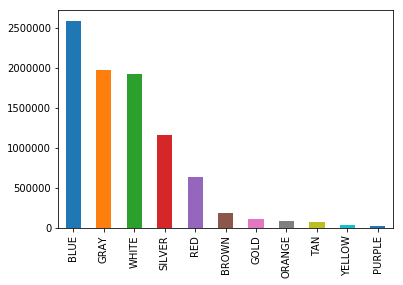

In [13]:
color = PC_df['Color']
color_count = color.value_counts()

print(color_count)

color_count.plot(kind='bar')

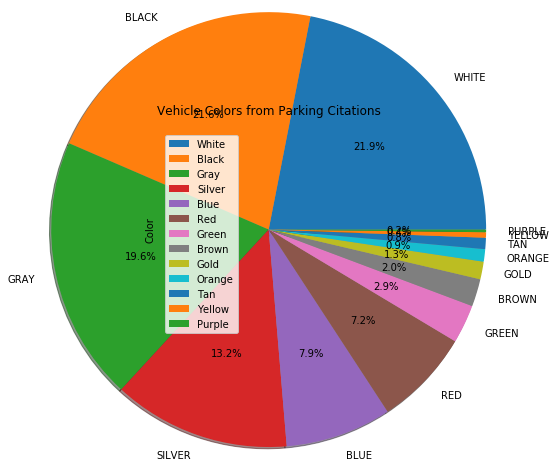

In [9]:
color_count[:13].plot.pie(shadow=True, startangle=0, radius=2.5, autopct='%1.1f%%')

plt.title('Vehicle Colors from Parking Citations')
labels = 'White', 'Black', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown', 'Gold', 'Orange', 'Tan', 'Yellow', 'Purple', 'Other'
plt.legend(labels,loc=3)



# Data Visualization

## Ideas

> ### Graphs:

> Color vs. # of tix

> Model vs. # of tix

> Color + model vs. # of tix

> Color vs. type of tix

>Model vs. type of tix

>Color + model vs. type of tix






# Data Analysis and Results

# Privacy/Ethics Considerations

The data was posted on Kaggleâ€™s data set page but the information is released to the public via DataLA, a public site maintained by the Los Angeles government. We have permission to use this data under the Open Database License. There are no privacy concerns in regard to the data. This data set is potentially biased in terms of who it composes for two reasons. The first is regional factors. For example if parking officials stay in a neighborhood where the parking restrictions are stricter then we would expect the models of the cars in that neighborhood to be over represented in the data set. The second reason is that some violations may be more for lower income individuals. For example we would expect lower income individuals to receive more expired registration violations because of their inability to afford registration. If we identify any of these issues, we can modify our research topic so that it does not include biased data. For example we will not analyze expired registration violations if we identify that the data is heavily skewed towards lower income models.

In addition, our dataset was already efficient in not including much personal identifiers of the individuals whose vehicles have received citations. We practiced the Safe Harbor method, in which we removed the VIN column from our dataset to further improve its anonymization. Thus, our project considerably respects the privacy of the individuals whose vehicles received citations as we have altered the dataset to focus solely on the vehicles.

# Conclusion and Discussion